In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:
studentsDS = '../data/sample-files/USCI/st-perf-10000.csv'
extraActivities  = 'Extracurricular Activities'

df = pd.read_csv(studentsDS)
df[extraActivities] = df[extraActivities].map(lambda x: 1 if str.lower(x) == 'yes' else 0)

print(df[extraActivities].head())
# print(encoded.head())
# print(ds.info())
# print(encoded.describe())


0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64


In [ ]:


tempDs = df.loc[:10]
standardScaler = StandardScaler()


stadardScaled = standardScaler.fit_transform(tempDs)
stadardScaled = pd.DataFrame(stadardScaled, columns=tempDs.columns)


minMaxScaler = MinMaxScaler()
minMaxScaled = minMaxScaler.fit_transform(tempDs)
minMaxScaled = pd.DataFrame(minMaxScaled,columns=tempDs.columns)


In [ ]:
print(tempDs.head())
print(stadardScaled.head())
print(minMaxScaled.head())
print(minMaxScaled.describe())

In [ ]:



# Optional: Set index if there's an 'Index' or 'Time' column
# if 'Index' in stadardScaled.columns:
#     stadardScaled.set_index('Index', inplace=True)

# Plot all columns
plt.figure(figsize=(20, 4))
for column in stadardScaled.columns:
    plt.plot(stadardScaled.index, stadardScaled[column], marker='o', label=column)

plt.title("Line Plot of All Columns")
# plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot all columns
plt.figure(figsize=(20, 4))
for column in minMaxScaled.columns:
    plt.plot(minMaxScaled.index, minMaxScaled[column], marker='o', label=column)

plt.title("Line Plot of All Columns")
# plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


studentsDS = '../data/sample-files/USCI/st-perf-10000.csv'
extraActivities  = 'Extracurricular Activities'
sourcePath = '../data/sample-files'
targetDirectory = '../data/training-files'
y_train_column = 'Performance Index'


df = pd.read_csv(studentsDS)
df[extraActivities] = df[extraActivities].map(lambda x: 1 if str.lower(x) == 'yes' else 0)

minMaxScaler = MinMaxScaler()
minMaxScaled = minMaxScaler.fit_transform(df)
df = pd.DataFrame(minMaxScaled,columns=df.columns)

y = df[y_train_column]
X = df.drop(columns=[y_train_column])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=242)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=242)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(X_cv.shape)
print(y_cv.shape)




(6000, 5)
(6000,)
(2000, 5)
(2000,)
(2000, 5)
(2000,)


In [80]:
import numpy as np

def predict(x,w,b):
    y_hat = np.dot(x,w) + b
    return y_hat

In [54]:


def linear_regression(X, w, b):
    y_hats = []
    for i in range(X.shape[0]):
        x = X[i]
        y_hats.append(predict(x, w, b))

    return y_hats


In [56]:
def compute_lr_cost(X,y, w, b):
    y_hats = linear_regression(X,w,b)

    sum=0
    for i in range(len(y)):
        true_y = y[i]
        y_hat = y_hats[i]
        sum+= (y_hat - true_y) ** 2

    cost = 1 * sum / (2 * len(y))

    return cost


In [68]:
def gradient_descent(X, y, w, b, a):
    w_sum = 0
    b_sum = 0
    for i in range(len(y)):
        x = X[i]
        true_y = y[i]
        y_hat = predict(x,w,b)

        b_sum += (y_hat - true_y)
        w_sum +=  b_sum * x

    dw = w - (a * (1 * w_sum / len(y)))
    db = b - (a * (1 * b_sum / len(y)))

    return (dw,db)


In [119]:
def reduce_cost(X, y, w, b, a):
    

    for i in range(3000):
        w,b = gradient_descent(X, y, w, b, a)

        print('Iteration ' + str(i+1) )
        print('B\t\t'+str(b))
        
        print('W\t\t'+str(np.sum(w)))
        print('=========================')

    return w,b


In [ ]:
w = [1,1,1,1,1]
b = 1
a = 0.0001
w, b = reduce_cost(X_train.to_numpy(), y_train.to_numpy(), w, b, a)

print('Final Result===========================')
print(w)
print(b)

In [ ]:
# W and B finalized after 3000 rounds
[-0.18019041 -0.18845894 -0.18471739 -0.20309086 -0.2271868 ]
0.9985738582774483

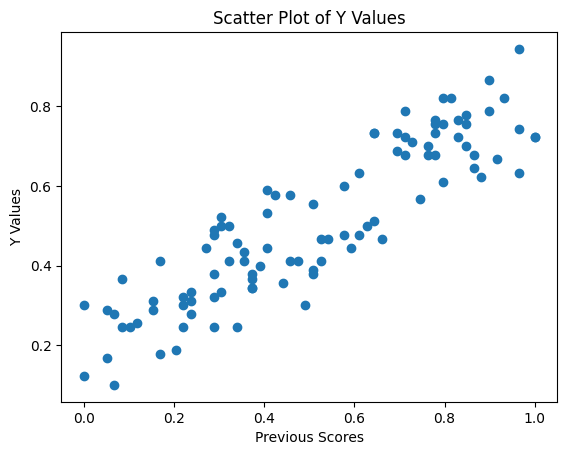

In [129]:
df_sampled = df.sample(n=100, random_state=42)

sample = y_train.sample(n=100, random_state=42)
xColumnName = 'Previous Scores';
xColumn = X_train[xColumnName]

plt.scatter(xColumn[:100], y_train[:100])
plt.xlabel(xColumnName)
plt.ylabel('Y Values')
plt.title('Scatter Plot of Y Values')
plt.show()